<a href="https://colab.research.google.com/github/swilsonmfc/anomaly/blob/master/MachineLearningRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Process


# Regression
* Classification maps data to a label
* Regression maps data to a countinuous outcome
* Low code approach to rapid prototyping supervised machine learning
* Highlight key steps in machine learning process

# Setup

In [ ]:
pip install pycaret

     |████████████████████████████████| 194kB 2.7MB/s 
     |████████████████████████████████| 61kB 4.0MB/s 
     |████████████████████████████████| 266kB 7.7MB/s 
     |████████████████████████████████| 1.6MB 8.6MB/s 
     |████████████████████████████████| 7.0MB 16.0MB/s 
     |████████████████████████████████| 133kB 44.3MB/s 
     |████████████████████████████████| 102kB 10.2MB/s 
     |████████████████████████████████| 81kB 8.0MB/s 
     |████████████████████████████████| 63.9MB 62kB/s 
     |████████████████████████████████| 1.2MB 39.1MB/s 
     |████████████████████████████████| 389kB 37.6MB/s 
     |████████████████████████████████| 3.2MB 41.5MB/s 
     |████████████████████████████████| 235kB 38.3MB/s 
     |████████████████████████████████| 552kB 32.6MB/s 
     |████████████████████████████████| 604kB 38.4MB/s 
     |████████████████████████████████| 71kB 8.5MB/s 
     |████████████████████████████████| 2.1MB 34.9MB/s 
     |████████████████████████████████| 71kB 7.8MB/s 
    

In [ ]:
pip install pandas-profiling==2.8

     |████████████████████████████████| 266kB 2.7MB/s 
     |████████████████████████████████| 71kB 6.5MB/s 
     |████████████████████████████████| 3.1MB 8.6MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
     |████████████████████████████████| 296kB 30.4MB/s 
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291990 sha256=96b3c8ac301d34ee71ddea47d3b4974c9dab2979503eb2d7ed8134306a98e6fc
  Stored in directory: /root/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built imagehash
ERROR: pycaret 1.0.0 has requirement pandas-profiling==2.3.0, but you'll have pandas-profiling 2.8.0 which is incompatible.
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1
  Found existing installation: pandas-profiling 2.3.0
    Uninstalling pandas-profiling-2.3.0:
      Successfully uninstalled pandas-profiling-2.3.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pycaret.datasets import get_data
from pycaret.classification import *
from pycaret.regression import *

import pandas_profiling as pp

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
pp.__version__

'2.8.0'

# Data Collection

## Diamond


In [ ]:
df = get_data('diamond')

Carat Weight    Cut Color Clarity Polish Symmetry Report  Price
0          1.10  Ideal     H     SI1     VG       EX    GIA   5169
1          0.83  Ideal     H     VS1     ID       ID   AGSL   3470
2          0.85  Ideal     H     SI1     EX       EX    GIA   3183
3          0.91  Ideal     E     SI1     VG       VG    GIA   4370
4          0.83  Ideal     G     SI1     EX       EX    GIA   3171

# EDA

In [ ]:
profile = pp.ProfileReport(df, title="Pandas Profiling Report")
profile

# Data Preparation

In [ ]:
experiment = setup(df, target='Price')

 
Setup Succesfully Completed!


# Good Features

## Categorical Data
* Machine Learning algorithms can't operate over strings
* The mapping process of strings to numerical values is often called encoding
* There are several types of encodings:
  * One Hot Encoding - Column per category encoded with 1 if member else 0
  * Label Encoding - One Column with unique ordinal value assigned to each category
  * Vector Encoding - One or more numeric columns mapped from each category
  * Hash Encoding - Map categories to "bins" that can squeeze the space to desired number of columns
  * Rare Encoding - Map common categories to their own column, group remaining to "other" or "rare"
* Typical process:
  * Note: Can be algorithm dependent 
  * Traditional ML, use One Hot or Label Encoding
  * Deep Learning, Use Vector Encoding (called an Embedding)
* <font color='blue'>How can categorical encodings help with bias / variance problems?</font>

## Numerical Data
* Numerical data may need to be standardized / normalized
  * Subtract mean & divide by standard deviation
  * Puts all data on same "scale"
  * Allows optimization / convergence to go faster
  * Not all algorithms need it (but are rarely hurt if you do)
* Discretization - changes a numeric value into a categorical by binning 
  * Age as numeric and age as bins 0-18, 18-65, 65+

## Data Problems
* There are always data issues to resolve in real world data sets


### Missing Data
* Some algorithms cannot handle a missing value
* Simple - Impute the missing using mean or median
* Fancy - Impute with a model (like a regression)
* Flag missing values with a categorical
  * Best practice!
  * Indicator variables like -1 or 9999 in a numeric field can cause problems
  * Allows model to use signal from missing

### Outliers
* For some techniques like linear regression outliers can exert influence a model
* Consider flagging or removing 
* Be careful about destroying valid information

### Zero Variance
* Zero variance columns have a few values and are mostly zero
* For example, 99.5% of the time the value is 0, 0.5% of the time it's a 1
* Consider removing near zero variance columns

### Multicollinearity
* Arises when features are highly correlated with each other
  * Example:  Left arm length, Right arm length
  * Example:  Distance & Time to Arrive
* Some techniques cannot handle these types of variables
  * Logistic Regression tries but you'll see large coefficients in opposite directions
  * Variable Importance can be split across these values
* Techniques to remove multi-collinearity
  * PCA / dimensionality reduction (but it linearly projects your data)
  * Correlation and feature elimination


### Imbalanced
* Most algorithms expect balance of classes
* When out of balance accuracy is a biased metric
  * For example a classifier on fraudulent transactions is 99.2% accurate.  
  * <font color='blue'>Is it good?</font>
* Resolve imbalance by:
  * Downsample the majority class
  * Oversample the minority class
  * Synthetically create minority class examples
  * Cost-Sensitive learning

# Models

## Best Practices & Tips
* Most of your time will not be spent modeling but rather in
  * Data Prep & Feature Engineering
  * Model Validation & Productionalizing
* Modeling is iterative ... get a baseline!
  * Identify a good loss function
  * Solve this in a simple way (baseline)
  * Build pipeline
  * Iterate techniques
  * Measure improvement over baseline
  * AutoML will help
* Tips
  * If you can't beat a baseline, you're wasting time
  * Complex models might take a long time to converge 
  * Build your pipeline for agility

## Loss
![alt text](https://1.bp.blogspot.com/-kL42RjXdOEc/XMELxXVMe3I/AAAAAAAABRw/mx2RoIheodwWj0CPAqg9chwXJmpOyPyJQCLcBGAs/s1600/Loss_Functions.PNG)

## Compare

In [ ]:
compare_models(blacklist=['xgboost', 'ransac', 'svm'])

# Training
* Evaluate both the top performing model (CatBoost) and Linear Regression
* Feature Importance is an important tool during the training process

## Feature Importance
* Models should strive for parsimony
  * Drop low signal features
  * Consider how to create new high signal features
  * Models with too many features
    * Train slow
    * Can be difficult to productionalize
* Feature Importance measures how much a variable contributes to the prediction
  * Coefficient based models
    * Large coefficients 
    * Intervals do not include 0
    * Use plot_model(...)
  * Tree based models
    * Contribution is related to reducing entropy
    * How often is the feature used to split?
    * Use interpret_model(...)
  * <font color='blue'>What about categorical variables?</font>

## Catboost

In [ ]:
cat = create_model('catboost')

MAE           MSE       RMSE      R2   RMSLE    MAPE
0     561.4134  1.005361e+06  1002.6768  0.9886  0.0656  0.0488
1     673.8022  1.891032e+06  1375.1480  0.9854  0.0692  0.0524
2     658.5979  1.727194e+06  1314.2276  0.9878  0.0626  0.0470
3     654.3336  1.979665e+06  1407.0058  0.9777  0.0714  0.0528
4     608.8886  1.269453e+06  1126.7000  0.9893  0.0633  0.0473
5     697.2899  3.710979e+06  1926.3901  0.9660  0.0718  0.0489
6     621.2298  1.288311e+06  1135.0377  0.9880  0.0655  0.0501
7     653.0383  1.596740e+06  1263.6219  0.9831  0.0772  0.0544
8     592.6196  1.567350e+06  1251.9384  0.9864  0.0644  0.0482
9     588.2841  1.604008e+06  1266.4944  0.9836  0.0651  0.0476
Mean  630.9497  1.764009e+06  1306.9241  0.9836  0.0676  0.0498
SD     40.9176  7.066375e+05   236.5560  0.0067  0.0044  0.0025

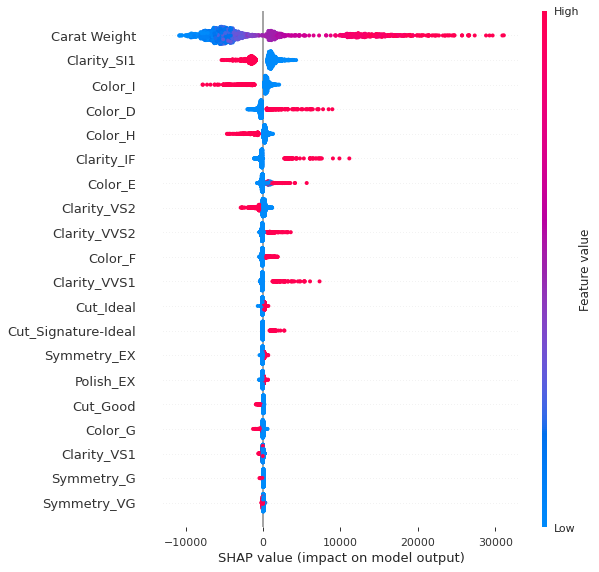

In [ ]:
interpret_model(estimator=cat)

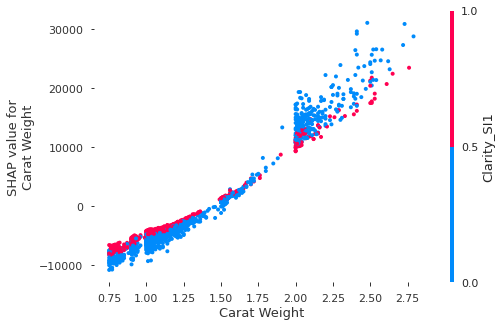

In [ ]:
interpret_model(cat, plot = 'correlation', feature = 'Carat Weight', )

## Linear Regression

In [ ]:
lr = create_model('lr')

MAE           MSE       RMSE      R2   RMSLE    MAPE
0     2421.0262  1.096038e+07  3310.6468  0.8759  0.5834  0.3134
1     2764.3129  2.150177e+07  4637.0003  0.8335  0.7661  0.3243
2     2662.6476  2.237248e+07  4729.9554  0.8417  0.4912  0.2741
3     2572.5071  1.498022e+07  3870.4286  0.8313  0.6412  0.3270
4     2623.6595  1.646398e+07  4057.5827  0.8611  0.5258  0.2853
5     2405.4167  1.399781e+07  3741.3644  0.8717  0.7088  0.2550
6     2516.6833  1.384662e+07  3721.1049  0.8713  0.8617  0.3235
7     2455.1643  1.253256e+07  3540.1359  0.8676  0.6113  0.2960
8     2506.2095  2.031633e+07  4507.3639  0.8241  0.5955  0.2889
9     2498.9200  1.273557e+07  3568.6929  0.8700  0.7222  0.3097
Mean  2542.6547  1.597077e+07  3968.4276  0.8548  0.6507  0.2997
SD     107.7875  3.840294e+06   471.5445  0.0189  0.1080  0.0228

In [ ]:
evaluate_model(estimator=lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Bias Variance Problems
* Model Underfitting
  * Build New Data Features
  * Feature Engineering
    * Add Interaction Terms
    * Add Polynomial Terms
    * Differences & Sums
  * <font color="blue">Two other ideas?</font>
* Model Overfitting
  * Capture more data (Augment data)
  * Add Regularization (L1 & L2 Penalties)
  * Feature Selection
    * Remove low performing features
    * Start with all features & Remove least important
    * Start with no features & Incrementally add most important
  * Early Stopping
  

In [ ]:
interpret_model(lr)

SystemExit: ignored

# Tuning
* Take model and explore hyperparameter tuning / options


## Approaches
* Grid Search
  * Given a list of hyperparameters generate values to test for each
  * Enumerate each combination
  * Expensive in terms of time
  * Redundant (if a particular value is poor we test it many times)
* Random Search
  * Practical approach
  * Randomly select from allowable combinations
  * Box to number of iterations or elapsed time
  * We search the space more efficiently
  * We might miss optimal values

![alt text](https://images.ctfassets.net/be04ylp8y0qc/4LbV7b6tEVlHROxHevpy2K/4ff835465f0a106104a79eaf17ca189c/1_P36a5xEr_C3fjcJU69yYmg.png?fm=jpg)

* Bayesian Optimization
  * Play "Battleship"
  * Search where it makes the most sense
  * Balance exploration & exploitation
  * Several libraries help (hyperopt)

In [ ]:
cat_tuned = tune_model('catboost', n_iter=50, optimize='mse')

MAE           MSE       RMSE      R2   RMSLE    MAPE
0     565.3831  9.541234e+05   976.7924  0.9892  0.0645  0.0487
1     657.0480  1.872589e+06  1368.4259  0.9855  0.0660  0.0499
2     690.1864  1.874397e+06  1369.0862  0.9867  0.0628  0.0486
3     666.1355  2.280859e+06  1510.2514  0.9743  0.0720  0.0517
4     638.8582  1.405727e+06  1185.6335  0.9881  0.0641  0.0485
5     699.0505  3.312782e+06  1820.1049  0.9696  0.0711  0.0494
6     616.9297  1.245338e+06  1115.9471  0.9884  0.0645  0.0502
7     656.4330  1.539692e+06  1240.8432  0.9837  0.0770  0.0549
8     579.7409  1.240885e+06  1113.9502  0.9893  0.0642  0.0476
9     608.1821  1.592757e+06  1262.0447  0.9837  0.0672  0.0497
Mean  637.7947  1.731915e+06  1296.3080  0.9839  0.0673  0.0499
SD     42.3621  6.392270e+05   226.9375  0.0063  0.0043  0.0020

## Parameters Tuned

In [ ]:
tuning_df = pd.DataFrame(columns=['Original', 'Tuned'])
for index, value in cat_tuned.get_all_params().items():
  tuning_df.loc[index] = [cat.get_all_params()[index], value]
tuning_df

Original           Tuned
nan_mode                                      Min             Min
eval_metric                                  RMSE            RMSE
iterations                                   1000             500
sampling_frequency                        PerTree         PerTree
fold_permutation_block                          0               0
leaf_estimation_method                     Newton          Newton
boosting_type                               Plain           Plain
feature_border_type                  GreedyLogSum    GreedyLogSum
bayesian_matrix_reg                           0.1             0.1
l2_leaf_reg                                     3               3
random_strength                                 1               1
rsm                                             1               1
boost_from_average                           True            True
model_size_reg                                0.5             0.5
approx_on_full_history                      False           False
subsample                                     0.8             0.8
use_best_model                              False           False
random_seed                                  5429            5429
depth                                           6               6
has_time                                    False           False
fold_len_multiplier                             2               2
border_count                                  254             200
classes_count                                   0               0
sparse_features_conflict_fraction               0               0
leaf_estimation_backtracking       AnyImprovement  AnyImprovement
best_model_min_trees                            1               1
model_shrink_rate                               0               0
loss_function                                RMSE            RMSE
learning_rate                                0.03             0.1
score_function                             Cosine          Cosine
task_type                                     CPU             CPU
leaf_estimation_iterations                      1               1
bootstrap_type                                MVS             MVS
permutation_count                               4               4

# Prediction
* How did we do on the holdout dataset?
* Our fine tuning beat out a default model by a little bit.
* CatBoost features good defaults, other models can benefit significantly from tuning.

In [ ]:
pred_holdout_cat = predict_model(cat)

Model       MAE           MSE       RMSE      R2  RMSLE    MAPE
0  CatBoost Regressor  564.1226  1.181906e+06  1087.1552  0.9869  0.063  0.0474

In [ ]:
pred_holdout_cat = predict_model(cat_tuned, )

Model       MAE           MSE       RMSE      R2   RMSLE   MAPE
0  CatBoost Regressor  555.6981  1.140640e+06  1068.0077  0.9874  0.0622  0.047

## Interpret

In [ ]:
interpret_model(cat_tuned, plot = 'reason', observation=0)

In [ ]:
interpret_model(cat_tuned, plot = 'reason')

# Finalize
* We trained and evaluated on the train / test splits
* For a final model (deployed) use all the data

In [ ]:
final_cat = finalize_model(estimator=cat_tuned)

# Deploy
* Store Pickle on S3
* Build into Docker
* Serve from EC2 / EKS / ECS 

# New Data

In [ ]:
df.head()

Carat Weight    Cut Color Clarity Polish Symmetry Report  Price
0          1.10  Ideal     H     SI1     VG       EX    GIA   5169
1          0.83  Ideal     H     VS1     ID       ID   AGSL   3470
2          0.85  Ideal     H     SI1     EX       EX    GIA   3183
3          0.91  Ideal     E     SI1     VG       VG    GIA   4370
4          0.83  Ideal     G     SI1     EX       EX    GIA   3171

In [ ]:
data = [{
  'Carat Weight':	1.1,
  'Cut': 'Ideal',
  'Color': 'E',	
  'Clarity': 'VS1',	
  'Polish': 'ID', 
  'Symmetry': 'EX',
  'Report': 'GIA'
}]
predict_model(cat_tuned, data = pd.DataFrame(data)) 

Carat Weight    Cut Color Clarity Polish Symmetry Report      Label
0           1.1  Ideal     E     VS1     ID       EX    GIA  8960.0732